In [132]:
import os
import random

import matplotlib.pyplot as plt
import pandas as pd
import torch

from src.data.loss_dataset import LossDataset
import numpy as np

In [133]:
def get_loss_dataset(dataset_path: str) -> pd.DataFrame:
    dataset = LossDataset(dataset_path)
    dataset.load()

    df = dataset.df
    return df


def get_indices_from_probe_suite(suite: list) -> list[int]:
    return [idx for _, idx in suite]

In [153]:
dataset_name = "cifar100"

probe_suite = torch.load(f"../../data/processed/{dataset_name}/train_probe_suite.pt")
df = get_loss_dataset("../../models/losses/cifar100-1x-gpua100-20230317_1117")
df["epoch"] = df["epoch"].astype(int)

suite_names = {
    "typical": "Typical",
    "atypical": "Atypical",
    "random_outputs": "Random outputs",
    # "random_inputs_outputs": "Random inputs and outputs",
    "corrupted": "Corrupted",
}

random_outputs = probe_suite.random_outputs
random_outputs_indices = [idx for _, idx in random_outputs]
df2 = df[df['sample_index'].isin(random_outputs_indices)]
df2.head()

,batch_idx,loss,sample_index,y,y_hat,epoch
9,0,4.335938,27106,43,50,0
35,0,5.843750,3437,85,50,0
44,0,4.550781,12787,92,7,0
98,0,6.101562,23899,66,50,0
175,1,4.121094,18148,51,50,0


In [154]:
preds = []
epochs = sorted(df2['epoch'].unique())

for epoch in epochs:
    temp = df2.groupby("epoch").get_group(epoch)

# Make new column with True if y == y_hat
    temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
    preds.append(temp['pred'].mean())

/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2868142940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2868142940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2868142940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

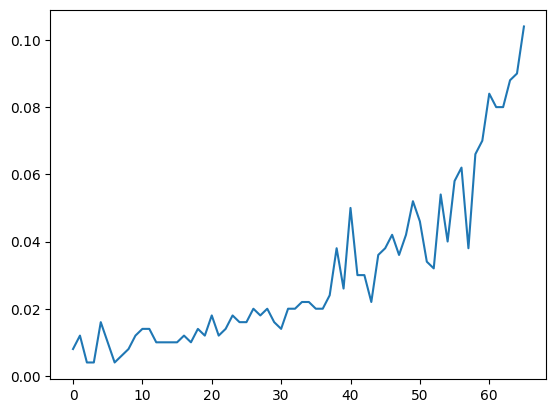

In [155]:
plt.plot(epochs, preds)
plt.show()

In [156]:

#epochs = sorted(df2['epoch'].unique())

temp = df2.groupby("epoch").get_group(20)

# Make new column with True if y == y_hat
temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)
temp['pred'].mean()
temp

/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_28936/2726312417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['pred'] = np.where(temp['y'] == temp['y_hat'], 1, 0)


,batch_idx,loss,sample_index,y,y_hat,epoch,pred
650038,0,3.037109,41374,24,7,20,0
650266,2,7.144531,5261,63,38,20,0
650291,2,6.031250,3437,85,30,20,0
650320,2,4.117188,7306,70,14,20,0
650397,3,8.679688,29460,89,94,20,0
...,...,...,...,...,...,...,...
699416,386,10.507812,12382,30,94,20,0
699515,386,6.460938,11042,46,36,20,0
699793,389,2.689453,47026,80,36,20,0
699901,389,6.054688,39488,62,67,20,0


table


Text(0.5, 1.0, 'Random Output w. label table')

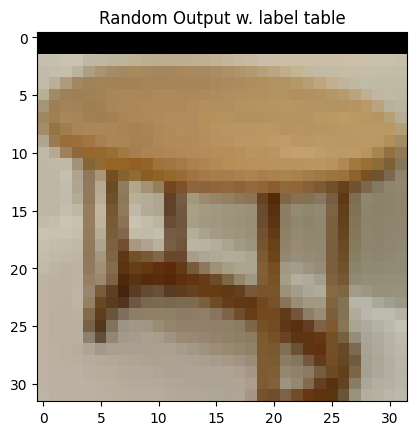

In [157]:
# plot some images
from src.data.idx_to_label_names import get_idx_to_label_names

idx_to_label = get_idx_to_label_names(dataset_name)

testid = 10939
# Plot the image
plt.imshow(probe_suite[testid][0][0].permute(1,2,0))
# Title
label = idx_to_label[probe_suite[testid][0][1]]
print(label)
plt.title(f"Random Output w. label {label}")


    

In [151]:
train = torch.load("../../data/processed/cifar10/train.pt")
# get correct labels from random outputs
correct_labels = [train[idx][1] for idx in random_outputs_indices]
# get incorrect labels from random outputs
random_labels = [probe_suite[idx][0][1] for idx in random_outputs_indices]

print(correct_labels[:10])
print(random_labels[:10])

[5, 4, 7, 4, 8, 2, 6, 5, 9, 2]
[8, 7, 4, 8, 1, 4, 4, 4, 7, 3]


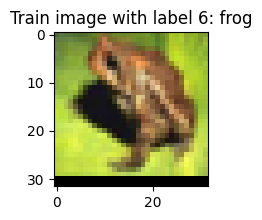

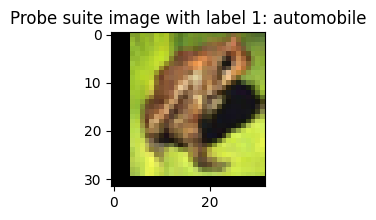

In [152]:
first_idx = testid

# plot from train and probe suite
plt.figure(figsize=(2,2))
plt.imshow(train[first_idx][0].permute(1,2,0))
plt.title(f"Train image with label {train[first_idx][1]}: {idx_to_label[train[first_idx][1]]}")
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(probe_suite[first_idx][0][0].permute(1,2,0))
plt.title(f"Probe suite image with label {probe_suite[first_idx][0][1]}: {idx_to_label[probe_suite[first_idx][0][1]]}")
plt.show()